PHYS 850 2022W, Assignment 2
============================
Add _Lastname_First name to file name and return as .ipynb and as .pdf to instructor

Lastname: Bagchi
---
First name: Mayukh
---
Grade:
---

* All code must be commented
* Figures must have titles, including on axes etc.
* Reply to each question in a new cell beneath it.  Each cell must run independently of the others.

Question 1 (/15)
===
By three methods, generate random variables from a distribution defined over 0,1 with $pdf(0)=1-d$, $pdf(1)=1+d$, and the pdf is linear in between.Illustrate by overlaying the distribution of the data and the scaled pdf in each case. The three methods should be:
* combining existing distributions from scipi.stats
* inverting the cdf
* double MC

Compare the speeds of each method by generating many events.

### For Inverting the cdf

<font size="3.5">

We have $pdf(0)= 1-d $ and $pdf(1)= 1+d$ and the $pdf$ is linear in between.

Hence the overall pdf would be :

\begin{equation}
    \\ slope = \frac{(1+d)-(1-d)} {1-0} = \frac{2d}{1} = 2d
\end{equation}

Hence we have the equation of straight line as : $ 2dx + 1-d $

Now the $pdf$ will be,

\begin{equation}
    \\ \dot{y}= 2d\dot{x} + (1-d)
\end{equation}

Integrating and solving for the inverse CDF

\begin{equation}
    \\ y= \int_{0}^{x} (2d\dot{x} + (1-d)) \,dx
    \\ y= \Biggr |dx^2 + (1-d)\dot{x}\Biggr|_{0}^{x}
    \\ y= dx^2 + (1-d)x
\end{equation}
    
Hence solving for x from this equation we finally have the inverse of the CDF as,
 
\begin{equation}
    x = \frac{-(1-d)\pm\sqrt{(1-d)^2 + 4yd}}{2d}
\end{equation}
    
</font>

Time taken by Combining Existing Distribution from scipy.stats :0.007231950759887695 secs


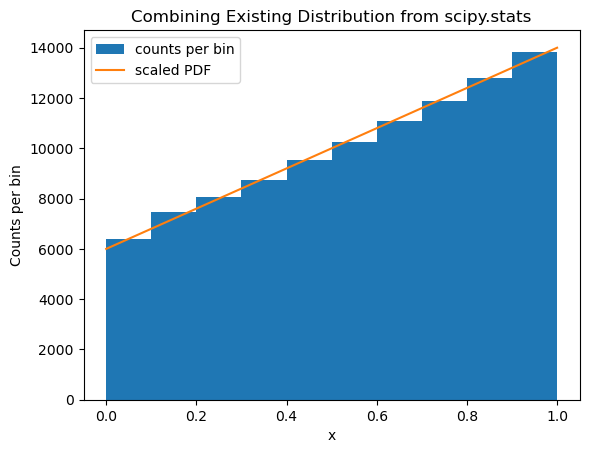

Time taken by Inverting CDF :0.0034096240997314453 secs


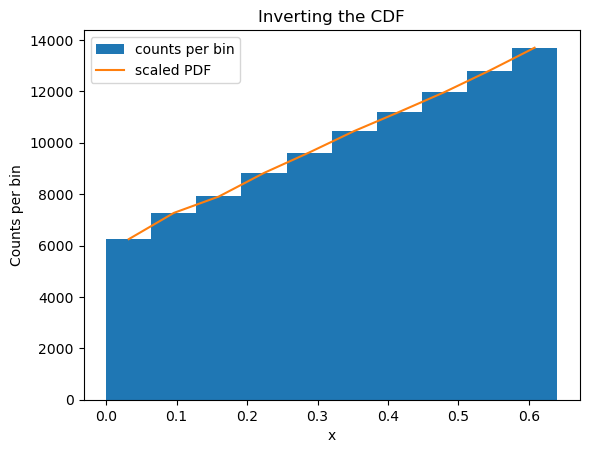

Time taken by Inverting CDF :0.060176849365234375 secs


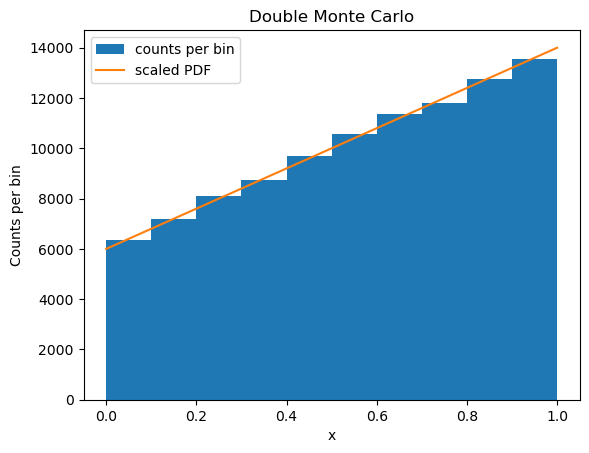

Inverting the CDF and Combining existing distributions to generate random variables from a distribution are both fast. Monte Carlo is slower compared to the other two


In [305]:
#importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang
from scipy.stats import uniform
import time

# you can change the value of d  between 0 and 1 
d=0.4      # d decides the slope of the linear part of the PDF : a higher d values gives a higher slope and a lower value of d gives a lower slope , at d=0 we have flat unifrom distribution
n=100000   # number of events

xrng= np.linspace (0,1,100) # x values

given_pdf = 2*d*xrng + (1-d) # the actual pdf of the question that is defined above

#------------------------------------------METHOD 1-------------------------------------------------------------------
# Combining Existing Distribution from scipy.stats
tm1start = time.time()
c=1                                                      # the sclaing parameter for the traingular distribution
uniform_data = uniform.rvs(size=int((1-d)*n))            # randomly generated uniform data , the size of the distribution is determined by d
triang_data = triang.rvs(c,size=int((d)*n))              # randomly generated traingular distribution data
combined_data = np.append(uniform_data,triang_data)      # combines both the distributions together
tm1end = time.time()
tm1 = tm1end-tm1start                                    # this calculates the time difference between start and stop times

#plotting method 1--------------------------------
countsm1,bin_edgesm1 = np.histogram(combined_data)   # to get the counts per bin and the bin edges
plt.title("Combining Existing Distribution from scipy.stats")
plt.xlabel("x")
plt.ylabel("Counts per bin")
plt.hist(combined_data,bins=bin_edgesm1,label="counts per bin")  # plotting the histogram with counts per bin
plt.plot(xrng,given_pdf*n/10,label="scaled PDF")                 # plotting the scaled PDF 
print("Time taken by Combining Existing Distribution from scipy.stats :"+str(tm1)+" secs")
plt.legend()
plt.show()

#------------------------------------------METHOD 2-------------------------------------------------------------------
#method 2 : Inverting the CDF-------------------
tm2start = time.time()
y = uniform.rvs(size=int(n))                        #uniform random variables
inv_cdf = (-(1-d) + np.sqrt((1-d)**2 + 4*y*d))/2*d  # equation of the inverted CDF equation as derived above
tm2end = time.time()
tm2 = tm2end-tm2start  # this calculates the time difference between start and stop times

#plotting method 2------------------------------
countsm2,bin_edgesm2 = np.histogram(inv_cdf*4)
bc = np.mean(np.vstack([bin_edgesm2[0:-1],bin_edgesm2[1:]]), axis=0) # bin centers
plt.title("Inverting the CDF")
plt.xlabel("x")
plt.ylabel("Counts per bin")
plt.hist(inv_cdf*4,bins=bin_edgesm2,label="counts per bin") # plotting the histogram with counts per bin
plt.plot(bc,countsm2,label="scaled PDF")            # plotting the scaled PDF 
print("Time taken by Inverting CDF :"+str(tm2)+" secs")
plt.legend()
plt.show()

#------------------------------------------METHOD 3-------------------------------------------------------------------
# method 3 : Double Monte Carlo-------------------
tm3start= time.time()
xvals= uniform.rvs(size=n)                 # randomly generated x values from an uniform distribution 
yvals = uniform.rvs(loc=0,scale=2,size=n)  # randomly generated x values from an uniform distribution which is around the PDF
rangenno =[]                               # empty list to store all the randomly generated values

for xvals,yvals in zip(xvals,yvals):       # for the values in the list of x and y random values
    if yvals <= 2*d*xvals + 1 -d:          # to check if the y value in the enclosed square around the PDF is less the PDF
        rangenno.append(xvals)             # If the condition meets we store the x values onto the empty list
tm3end = time.time()
tm3= tm3end-tm3start                       # this calculates the time difference between start and stop times

#plotting method 3-------------------------------
countsm3,bin_edgesm3 = np.histogram(rangenno)  # to get the counts per bin and the bin edges
plt.title("Double Monte Carlo")
plt.xlabel("x")
plt.ylabel("Counts per bin")
plt.hist(2*rangenno,bins=bin_edgesm3,label="counts per bin") # plotting the histogram with counts per bin
plt.plot(xrng,given_pdf*n/10,label="scaled PDF")             # plotting the scaled PDF 
print("Time taken by Inverting CDF :"+str(tm3)+" secs")
plt.legend()
plt.show()

print("Inverting the CDF and Combining existing distributions to generate random variables from a distribution are both fast. Monte Carlo is slower compared to the other two")

Question 2 (/5)
===
Generate $10^5$ events from distribution $1/5 e^{-x/5}$ truncated over 0-1 using scipy.stats.trunexpon.  Plot:
* counts per bin with uniform binning
* counts per bin with binning $[0, 0.1, 0, 0.3, 0.6, 1.0]$
In each case, overlay the expected number of counts in each bin.

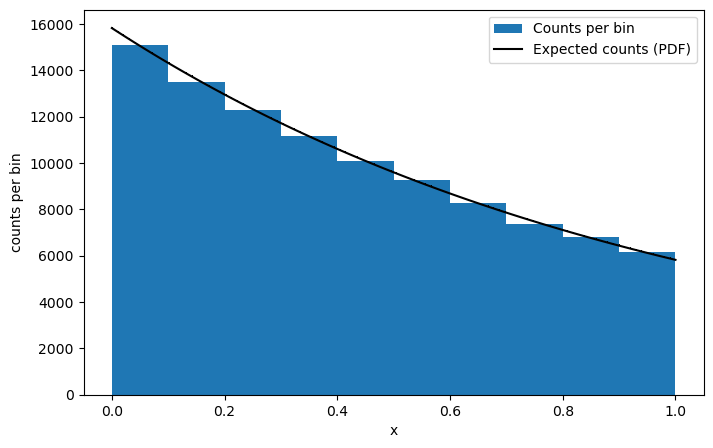

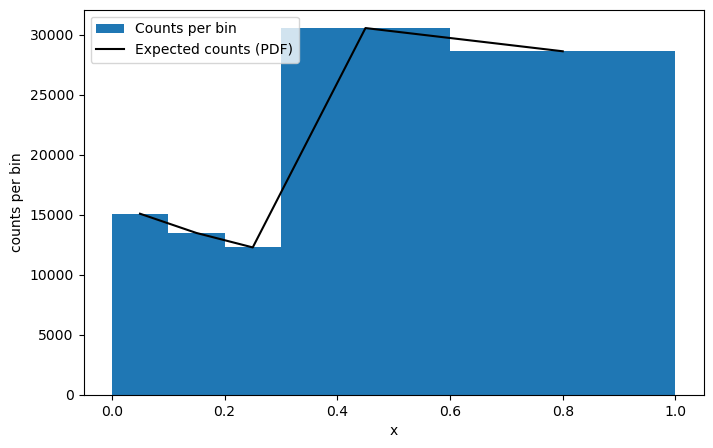

In [119]:
#importing the libraries 

from scipy.stats import truncexpon
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

size= 10**5                      # sample size
b=1                              # 0 to which number does the truncation continue to, in this case its 1 ( as given in the question)
r = truncexpon.rvs(b, size=size) # generating the truncated random variables

x=np.linspace(0,1,100)           # defining the x data 
c,e = np.histogram(r)            # counts and bin edges


# plotting with uniform binning

plt.figure(figsize=(8,5)) 
plt.hist(r, bins=e,label='Counts per bin')                                      #plotting the histogram
plt.plot(x, size/10*truncexpon.pdf(x,b), 'k-,',label='Expected counts (PDF)')   # plotting the scaled PDF over the truncated section
plt.xlabel('x')
plt.ylabel('counts per bin')
plt.legend()
plt.show()

# with specified binning

bin_edges = [0,0.1,0.2, 0.3, 0.6, 1.0]                             # bin edges as defined in the question                          
counts, bined = np.histogram(r,bins=bin_edges)                     # finding the bin counts and bin edges
bc = np.mean(np.vstack([bin_edges[0:-1],bin_edges[1:]]), axis=0)   # bin centers for all the bins so that we can make the plot of the expected number of counts in each bin (PDF)

plt.figure(figsize=(8,5))
plt.hist(r, bins=bin_edges,label='Counts per bin')
plt.plot(bc,counts,'k-',label="Expected counts (PDF)")
plt.xlabel('x')
plt.ylabel('counts per bin')
plt.legend()
plt.show()

Question 3 (/10)
===
Look up, or derive, the characteristic function of a Cauchy distribution.  Using it, determine the pdf of the sum of $n$ identical independent Cauchy variables, each of pdf $\frac{1}{\pi} \frac{1}{1 + x^2}$.  What type of a distribution does the sum follow?

<font size="3.5">

Standard pdf of a Cauchy distribution is :$\frac{1}{\pi} \frac{1}{1 + x^2}$

We know that the characteristic function is defined as : $ \phi_x(k) = E(e^{ikx}) = \int_{-\infty}^{+\infty} e^{ikx} f(x) \,dx  $

So, the characteristic function for a cauchy distribution : $ \phi_x(k) = \int_{-\infty}^{+\infty} \frac {e^{ikx}} {\pi(1+ x^2)}  \,dx $

    
\begin{equation}
    \phi_x(k) = \int_{-\infty}^{+\infty} \frac {e^{ikx}} {\pi(1+ x^2)}  \,dx 
    \\where,  e^{ikx}= \cos(kx) + i\sin(kx)
    \\ now , \frac {1}{\pi} \int_{-\infty}^{+\infty} \frac {cos(kx)+ isin(kx)} {x^2 + 1} \,dx
    \\ breaking, \frac {1}{\pi} [ \int_{-\infty}^{+\infty} \frac {cos(kx)} {x^2 + 1} \,dx + \int_{-\infty}^{+\infty} \frac {isin(kx)} {x^2 + 1} \,dx]
\end{equation}

Clearly, the $2^{nd}$ term with : $\int_{-\infty}^{+\infty} \frac {isin(kx)} {x^2 + 1} \,dx $ is an odd function whose integral over $ -\infty$ to $+\infty $ will be $0$
    
Writing the first half of the integral from $0$ to $+\infty$
    
\begin{equation}
    \\ hence, \frac{2}{\pi} \int_{0}^{+\infty} \frac {cos(kx)} {x^2 + 1} \,dx
\end{equation}   
    
Finally solving the integral we get ,
    
\begin{equation}
    \\ \frac{2}{\pi} (\frac{\pi}{2} e^{-|t|})
\end{equation}
    
Hence finally the characteristic function of a Cauchy distribution is :
    
\begin{equation}
    \\ \phi_x(k) = e^{-|t|}
\end{equation}
    
Sum of n identical independent Cauchy Variables with the same pdf, $\frac{1}{\pi} \frac{1}{1 + x^2}$ will have the characteristic function as:
    
\begin{equation}
    \\ e^{-n|t|}
\end{equation}
    
Now to find the PDF of this we would need to take the inverse Fourier :
    
\begin{equation}
    \\ F^{-1} _x(t) = \int_{-\infty}^{+\infty} e^{2\pi ikx} e^{-n|t|} \,dx
\end{equation}
    
Breaking up the integral,

\begin{equation}
    \\  \int_{-\infty}^{0} e^{2\pi ikx-n|t|} \,dx + \int_{0}^{+\infty} e^{2\pi ikx+n|t|} \,dx
\end{equation}
    
Solving the integrals we have ,

\begin{equation}
    \\  \frac{1}{2\pi n(1-i\frac{x}{n})} + \frac{1}{2\pi n(1+i\frac{x}{n})}
    \\  Finally, \frac {1}{n\pi(1+i\frac{x^2}{n^2})}
\end{equation}    

Hence, this is also the PDF of an Cauchy distribution i.e the sum also follows a Cauchy Distribution. 
Cauchy Distribution clearly doesnot obey the Central Limit Theorem as it doesnot have a finite mean and variance.
    
Another way to look at it is, 
    
The standard PDF of Cauchy distribution is defined as :
\begin{equation}
    \\ \frac{1}{\pi\gamma[1+\frac{(x)^2}{\gamma^2}]}
\end{equation} 

And the standard Characteristic function of the same is :

\begin{equation}
    \\ e^{-\gamma|t|}
\end{equation} 
    
Where $\gamma $ is the scale factor
    
The final expression of sum of n independent Cauchy variables we get a characteristic function as : $e^{-n|t|}$ 
    
Comapiring that with the standard characteristic function : $e^{-\gamma|t|}$ ,

Hence in my case , $n$ is same as the scale factor $\gamma$, which tells us that the characteristic function of n independent Cauchy Variable is also a Cauchy distribution.
 
</font>

Question 4 (/10)
===
Generate $10^4$ random variables $X$, each of which is the sum of $m$ independent Cauchy variables.  Repeat for $m$ in 1, 2, 3, 10, 100, 1000.   At each stage, plot the distribution, and determine the mean and standard deviation of $X$.  What does this illustrate?

m=1			mean_x=-0.73	std=76.41
	Expected:	mean_x=0.50	std=0.29


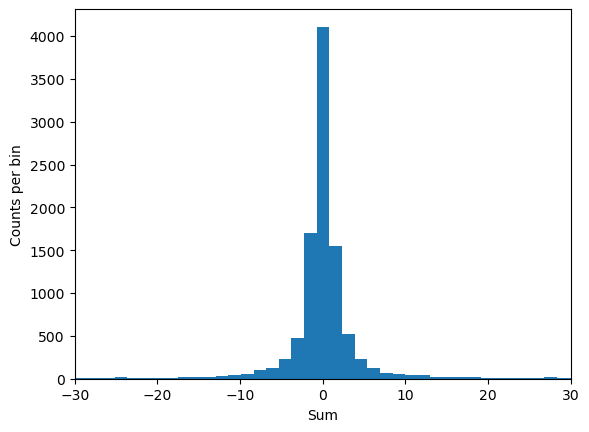

m=2			mean_x=1.71	std=215.13
	Expected:	mean_x=1.00	std=0.41


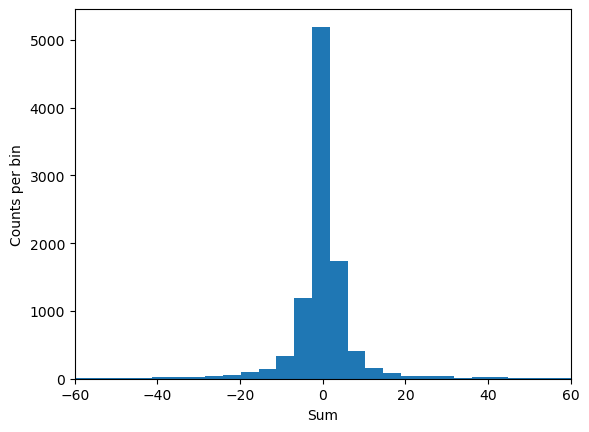

m=3			mean_x=2.41	std=195.73
	Expected:	mean_x=1.50	std=0.50


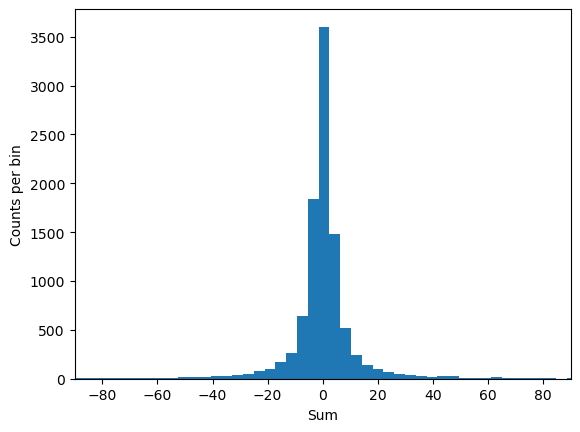

m=10			mean_x=-3.47	std=702.08
	Expected:	mean_x=5.00	std=0.91


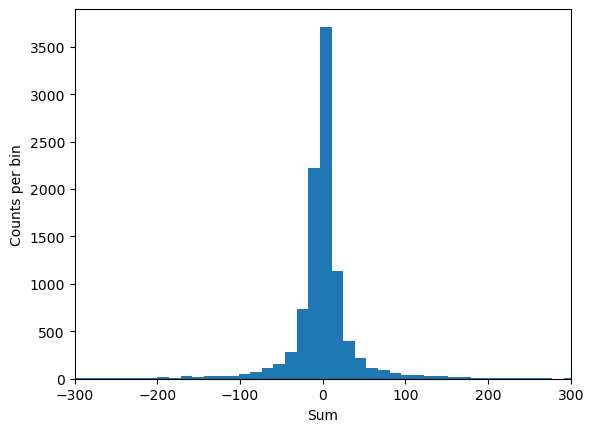

m=100			mean_x=-147.09	std=8070.55
	Expected:	mean_x=50.00	std=2.89


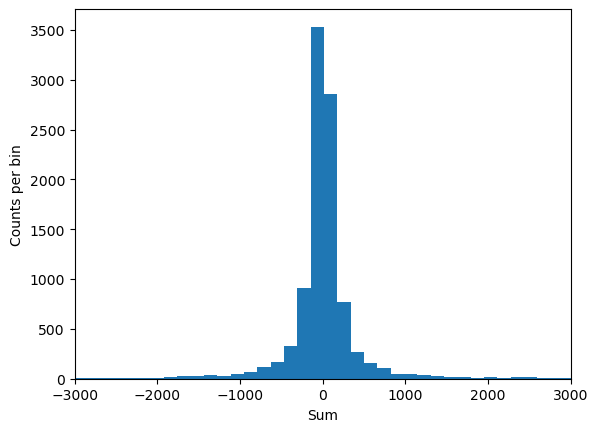

m=1000			mean_x=-2.10	std=42731.15
	Expected:	mean_x=500.00	std=9.13


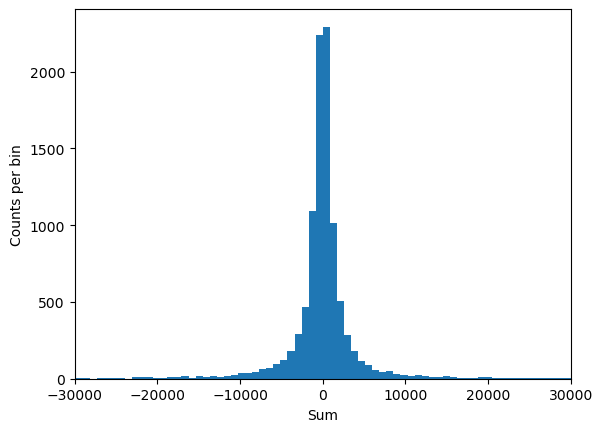

This illustrates the central limit theorem doesnot hold true for the Cauchy Distribution as it doesnot have a defined mean and variance


In [300]:
#importing the libraries 

from scipy.stats import cauchy
import numpy as np
import matplotlib.pyplot as plt

n = 10000                                                 # sample size

for m in [1, 2, 3, 10, 100, 1000]:                        # the dfferent values of m for which the iteration will run for as given in the question
    x = [sum(cauchy.rvs(size=m)) for j in range(n)]       # summing the randomly generated Cauchy variables
    c,e = np.histogram(x)                                 # counts of the bins and the bin edges
    mu, std = np.mean(x), np.std(x)                       # calculates the mean and the standard deviation of the randomly generated variables for each m
    muExpected, stdExpected = m / 2.0, np.sqrt(m / 12.0)  # calculates the expected mean and expected standard deviation for each m
    print("m=" + str(m) + "\t\t\tmean_x=" + str("%.2f" % mu) + "\tstd=" + str("%.2f" % std))             # prints the information
    print("\tExpected:" + "\tmean_x=" + str("%.2f" % muExpected) + "\tstd=" + str("%.2f" % stdExpected)) 
    # plotting the data
    plt.hist(x, bins=np.linspace(mu-1*std, mu+1*std, 101))  # plotting the histogram
    plt.xlim(-30*m,30*m)                                    # chosing how much of the x limits to display, otherwise the distributions almost look like a dirac delta
    plt.xlabel('Sum')
    plt.ylabel('Counts per bin')
    plt.show()
print("This illustrates the central limit theorem doesnot hold true for the Cauchy Distribution as it doesnot have a defined mean and variance")    

Question 5 (/10)
===
For  $n$ in  1, 10, 100, 1000, 10000, generate n times $t_1, t_2 ... t_n$ from an exponential distribution of time constant $\tau$, to simulate the decay of a radioactive source.  Plot the likelihood written in class divided by its maximum as a function of $\tau$.  Make similar plots for minus the natural logarithm of the likelihood over its maximum.  Analytically determine the position and maximum (or minimum) of the curves.  Comment on the shape of the curves and how they depend on $n$.

<font size="3.5">

So we know the natural log of the likelihood is :

\begin{equation}
   \\ ln \mathscr{L}= -nln\tau - \frac {\sum t_i}{\tau}
\end{equation}

Now taking the derivative of the likelihood and equating it to zero ( for the maximum (or minimum)) we have : 

\begin{equation}
   \\ \dot{\mathscr{L}} = \frac{-n}{\tau} + \frac{\sum {t}}{\tau^2} = 0
\end{equation}

So we get, 

\begin{equation}
   \\ \tau = \frac{\sum{t}}{n}
   \\ or, \tau = \bar{t}
\end{equation}

Hence $\tau = \bar{t}$ is the point of maximum ( or minimum) of the curves

for n≥1000, the likelihood is so small python cannot handle it and we get errors!


/tmp/ipykernel_18637/4241549516.py:10: RuntimeWarning: overflow encountered in power
  return (1/tau**n)*(np.exp(-np.sum(tlist)/tau))
/tmp/ipykernel_18637/4241549516.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return (1/tau**n)*(np.exp(-np.sum(tlist)/tau))
/tmp/ipykernel_18637/4241549516.py:10: RuntimeWarning: overflow encountered in true_divide
  return (1/tau**n)*(np.exp(-np.sum(tlist)/tau))
/tmp/ipykernel_18637/4241549516.py:10: RuntimeWarning: invalid value encountered in multiply
  return (1/tau**n)*(np.exp(-np.sum(tlist)/tau))


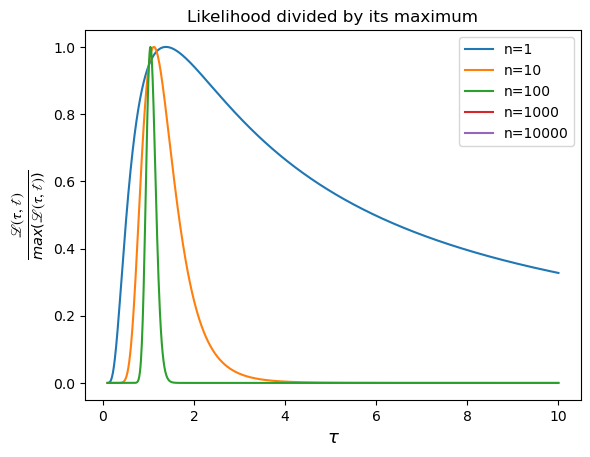

Its better to use the log of the likelihood in this case


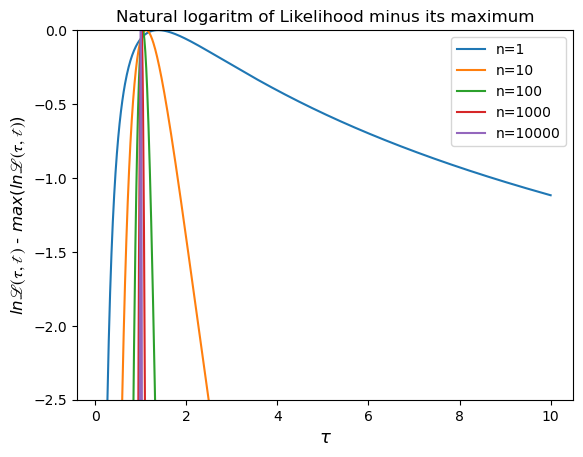

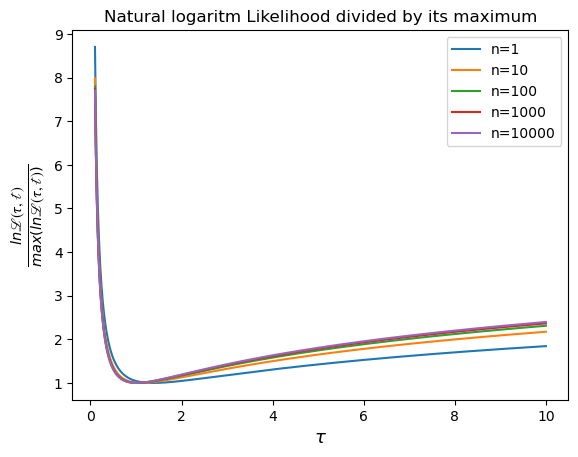

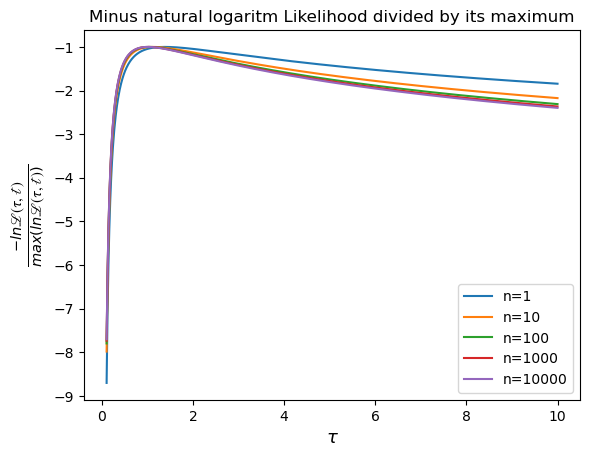



The maximum of the curves based on the analytical treatment shown above: 
The maximum of the 1st curve (n=1) is:1.3825769098041294
The maximum of the 2nd curve (n=10) is:1.1171226353543986
The maximum of the 3rd curve (n=100) is:1.0424396563538014
The maximum of the 4th curve (n=1000) is:1.0165067032136854
The maximum of the 5th curve (n=10000) is:1.0023464366567838


Some comments on the shape of the curves and how it depends on n:
1. Greater the statistics the sharper the likehood is going to be.
2. Greater the statistics the likehood is going to be more symmetrical, eventually it gets towards the shape of a parabola which is essentially the log of a Gaussioan.


In [307]:
#importing the libraries 
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math

# defining the actual likelihood function
def l (tau,tlist):
    n = len(tlist)
    return (1/tau**n)*(np.exp(-np.sum(tlist)/tau))

#defining the log of the likelihood function
def lnl (tau,tlist):
    n = len(tlist)
    return  -n*np.log(tau) -np.sum(tlist)/tau

#--------------------------the different sizes of the randomly generated exponential functions-----------------
tlist1 = expon.rvs(size=1)
tlist2 = expon.rvs(size=10)
tlist3 = expon.rvs(size=100)
tlist4 = expon.rvs(size=1000)
tlist5 = expon.rvs(size=10000)

# generating the values of tau
taulist = np.linspace(0.1,10,1000)

#---------------------plotting the likelihood divided by its maximum as a function of tau----------------------------
# Plotting the curves
plt.title("Likelihood divided by its maximum")
plt.xlabel(r'$ \tau  $',size=13)
plt.ylabel(r'$\frac{\mathscr{L(\tau,t)}}{max(\mathscr{L(\tau,t)})}$',size=15)
plt.plot(taulist, l(taulist,tlist1)/max(l(taulist,tlist1)),label='n=1')
plt.plot(taulist, l(taulist,tlist2)/max(l(taulist,tlist2)),label='n=10')
plt.plot(taulist, l(taulist,tlist3)/max(l(taulist,tlist3)),label='n=100')
plt.plot(taulist, l(taulist,tlist4)/max(l(taulist,tlist4)),label='n=1000')
plt.plot(taulist, l(taulist,tlist5)/max(l(taulist,tlist5)),label='n=10000')
print("for n≥1000, the likelihood is so small python cannot handle it and we get errors!")
plt.legend()
plt.show()

print("Its better to use the log of the likelihood in this case")

#------------------plotting the natural logaritm of Likelihood minus its maximum--------------------------------
# Plotting the curves
plt.title("Natural logaritm of Likelihood minus its maximum")
plt.xlabel(r'$ \tau  $',size=13)
plt.ylabel(r'$ ln \mathscr{L(\tau,t)}}$ - $ max (ln \mathscr{L(\tau,t)}) $',size=12)
plt.plot(taulist, lnl(taulist,tlist1)-max(lnl(taulist,tlist1)),label='n=1')
plt.plot(taulist, lnl(taulist,tlist2)-max(lnl(taulist,tlist2)),label='n=10')
plt.plot(taulist, lnl(taulist,tlist3)-max(lnl(taulist,tlist3)),label='n=100')
plt.plot(taulist, lnl(taulist,tlist4)-max(lnl(taulist,tlist4)),label='n=1000')
plt.plot(taulist, lnl(taulist,tlist5)-max(lnl(taulist,tlist5)),label='n=10000')
plt.ylim(-2.5,0)
plt.legend()
plt.show()

#-----------------plotting the natural logaritm Likelihood divided by its maximum---------------------------------
# Plotting the curves
plt.title("Natural logaritm Likelihood divided by its maximum")
plt.xlabel(r'$ \tau  $',size=13)
plt.ylabel(r'$\frac{ln \mathscr{L(\tau,t)}}{max(ln \mathscr{L(\tau,t)})}$',size=15)
plt.plot(taulist, lnl(taulist,tlist1)/max(lnl(taulist,tlist1)),label='n=1')
plt.plot(taulist, lnl(taulist,tlist2)/max(lnl(taulist,tlist2)),label='n=10')
plt.plot(taulist, lnl(taulist,tlist3)/max(lnl(taulist,tlist3)),label='n=100')
plt.plot(taulist, lnl(taulist,tlist4)/max(lnl(taulist,tlist4)),label='n=1000')
plt.plot(taulist, lnl(taulist,tlist5)/max(lnl(taulist,tlist5)),label='n=10000')
plt.legend()
plt.show()

##-----------------plotting the minus of natural logaritm Likelihood divided by its maximum---------------------------------
# Plotting the curves
plt.title("Minus natural logaritm Likelihood divided by its maximum")
plt.xlabel(r'$ \tau  $',size=13)
plt.ylabel(r'$\frac{- ln \mathscr{L(\tau,t)}}{max(ln \mathscr{L(\tau,t)})}$',size=15)
plt.plot(taulist, -lnl(taulist,tlist1)/max(lnl(taulist,tlist1)),label='n=1')
plt.plot(taulist, -lnl(taulist,tlist2)/max(lnl(taulist,tlist2)),label='n=10')
plt.plot(taulist, -lnl(taulist,tlist3)/max(lnl(taulist,tlist3)),label='n=100')
plt.plot(taulist, -lnl(taulist,tlist4)/max(lnl(taulist,tlist4)),label='n=1000')
plt.plot(taulist, -lnl(taulist,tlist5)/max(lnl(taulist,tlist5)),label='n=10000')
plt.legend()
plt.show()


#----------------------calculating the maximum of the curves using the formulae derived above----------------------------- 

maxln1 = sum(tlist1)/len(tlist1) # for n=1 
maxln2 = sum(tlist2)/len(tlist2) # for n=10 
maxln3 = sum(tlist3)/len(tlist3) # for n=100 
maxln4 = sum(tlist4)/len(tlist4) # for n=1000 
maxln5 = sum(tlist5)/len(tlist5) # for n=10000

#--------------------printing the maximum of the curves....................................
print("\n")
print("The maximum of the curves based on the analytical treatment shown above: ")
print("The maximum of the 1st curve (n=1) is:" +str(maxln1))
print("The maximum of the 2nd curve (n=10) is:" +str(maxln2))
print("The maximum of the 3rd curve (n=100) is:" +str(maxln3))
print("The maximum of the 4th curve (n=1000) is:" +str(maxln4))
print("The maximum of the 5th curve (n=10000) is:" +str(maxln5))

#-------------------comments on the shape of the curve------------------------------------
print("\n")
print("Some comments on the shape of the curves and how it depends on n:")
print("1. Greater the statistics the sharper the likehood is going to be.")
print("2. Greater the statistics the likehood is going to be more symmetrical, eventually it gets towards the shape of a parabola which is essentially the log of a Gaussioan.")